In [1]:
import numpy as np
print(f"numpy version: {np.__version__}")
import pandas as pd
print(f"pandas version: {pd.__version__}")
import matplotlib.pyplot as plt

numpy version: 1.22.3
pandas version: 1.4.3


In [2]:
df = pd.read_csv('2017_jun_final.csv')
df.head(2)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA


In [3]:
# get table size and types of the columns
print(df.shape)
print(df.dtypes)

(8704, 25)
N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary               

In [4]:
len(df)

8704

In [5]:
# check how many isnull are in each column
print(df.isnull().sum())
print(f"\n Percentage of the NaN values over all: \n {round(pd.isnull(df).sum()/len(df)*100, 2)}")

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [6]:
# get columns that have NaNs
df_nan = df.loc[:, df.isna().any()]
#print(df_nan)
# get list of column names that has NaNs but exclude 'Язык.программирования'
columns_nan = list(df_nan.loc[:, df_nan.columns != 'Язык.программирования'])
print(columns_nan)

['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls']


In [7]:
# get df w/o NaN but include 'Язык.программирования'
df_wo_nan = df.drop(columns_nan, axis=1)
print(df_wo_nan.isnull().sum())
# get percentage of the NaN values over all
print(f"\n Percentage of the NaN values over all: \n {round(pd.isnull(df_wo_nan).sum()/len(df_wo_nan)*100, 2)}")

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

 Percentage of the NaN values over all: 
 N                                    0.00
Должность                            0.00
Язык.программирования               44.2

In [8]:
# dropna = Remove all rows that have missing values in df_wo_nan
df_dropana = df_wo_nan.dropna()
print(f"Len of the table before dropana: {len(df_wo_nan)}")
print(f"Len of the table after dropana: {len(df_dropana)}")


Len of the table before dropana: 8704
Len of the table after dropana: 4854


In [9]:
# get the shape of a new df wo NaN
df_dropana.shape

(4854, 20)

In [10]:
# get df where 'Язык.программирования' is not NaN
python_data = df[df['Язык.программирования'].notna()]

In [11]:
python_data=python_data[python_data["Язык.программирования"]=='Python']
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,до 50 человек,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


In [12]:
# get the shape of the python_data
python_data.shape

(207, 25)

In [13]:
# groupby "Должность"
python_data_gb = python_data.groupby('Должность')
python_data_gb.first()

,N,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
Должность,,,,,,,,,,,,,,,,,,,,,
Junior Software Engineer,88,Python,None,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.50,600,None,DEV
Senior Software Engineer,303,Python,None,10 и более лет,0.5,3500,-300,Киев,до 200 человек,Продуктовая,...,False,выше среднего,"Веб-разработка,Gamedev",12/06/2017 13:46:24,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,10.0,0.50,3500,None,DEV
Software Engineer,13,Python,None,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.00,800,None,DEV
System Architect,5749,Python,None,10 и более лет,0.25,3000,0,Киев,до 50 человек,Продуктовая,...,False,выше среднего,"Веб-разработка,eCommerce",20/06/2017 18:40:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,10.0,0.25,3000,None,SDEV
Technical Lead,2633,Python,None,4,1.5,3500,1000,Киев,до 50 человек,Продуктовая,...,False,выше среднего,Веб-разработка,13/06/2017 12:37:02,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,4.0,1.50,3500,None,SDEV


In [14]:
# groupby "Должность" and get agg min and max of Зарплата.в.месяц

grouped_df = python_data.groupby('Должность').agg({'Зарплата.в.месяц':['min', 'max', 'mean']})
grouped_df

Зарплата.в.месяц                   
                                      min   max         mean
Должность                                                   
Junior Software Engineer              100  1250   560.841270
Senior Software Engineer             1300  9200  3387.096774
Software Engineer                     500  5400  1799.070000
System Architect                     3000  5000  4000.000000
Technical Lead                       1425  6200  3165.909091

In [15]:
# prepare function fill_avg_salary that gives mean value of Зарплата.в.месяц and add it to df.avg

def fill_avg_salary(salary):
    # get mean salary
    return round(salary.mean(), 2)

avg = python_data.groupby('Должность').agg('Зарплата.в.месяц').apply(fill_avg_salary)
print(type(avg))
avg

<class 'pandas.core.series.Series'>


Должность
Junior Software Engineer     560.84
Senior Software Engineer    3387.10
Software Engineer           1799.07
System Architect            4000.00
Technical Lead              3165.91
Name: Зарплата.в.месяц, dtype: float64

In [16]:
def fill_avg_salary(row):
    # avg salary for 'Должность'
    return python_data[python_data['Должность']==row['Должность']]["Зарплата.в.месяц"].mean()

# создаем столбец с Средними зарплатами
python_data["avg"]=python_data.apply(fill_avg_salary, axis=1)

In [17]:
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls,avg
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV,1799.070000
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV,1799.070000
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV,560.841270
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,...,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV,560.841270
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,...,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV,560.841270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,...,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV,1799.070000
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,...,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV,1799.070000
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,...,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV,3387.096774
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,до 50 человек,...,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV,560.841270


In [18]:
groups_groupby = python_data.groupby('Должность')
group_list = list(groups_groupby.groups.keys())
group_list

['Junior Software Engineer',
 'Senior Software Engineer',
 'Software Engineer',
 'System Architect',
 'Technical Lead']

In [19]:
# add describe statistics
python_data['avg'].describe()

count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64

In [20]:
# save the table python_data to the csv file
python_data.to_csv('python_jobs_with_average_salary.csv')

# Ploting of the results for HW #3


In [22]:
python_data.head(3)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls,avg
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV,1799.07000
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV,1799.07000
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV,560.84127


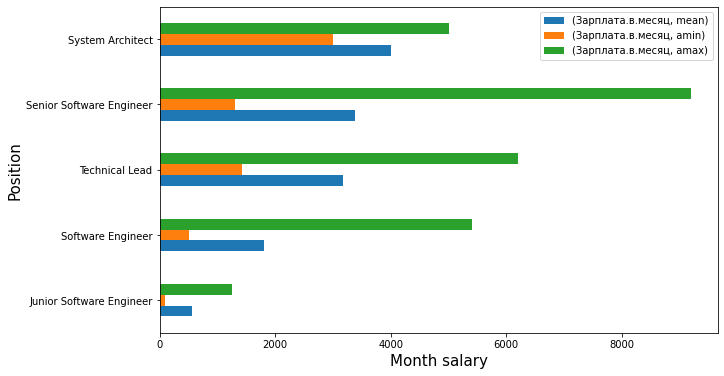

In [36]:
grouped_df = python_data.groupby(['Должность'])[["Зарплата.в.месяц"]].agg([np.mean, np.min, np.max])
grouped_df = grouped_df.sort_values(by =('Зарплата.в.месяц', 'mean'))

# plot the salary
grouped_df.plot(kind='barh',figsize=(10,6))
plt.legend()
plt.xlabel('Month salary', size = 15)
plt.ylabel('Position', size = 15)
plt.show()

In [38]:
df.head(2)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA


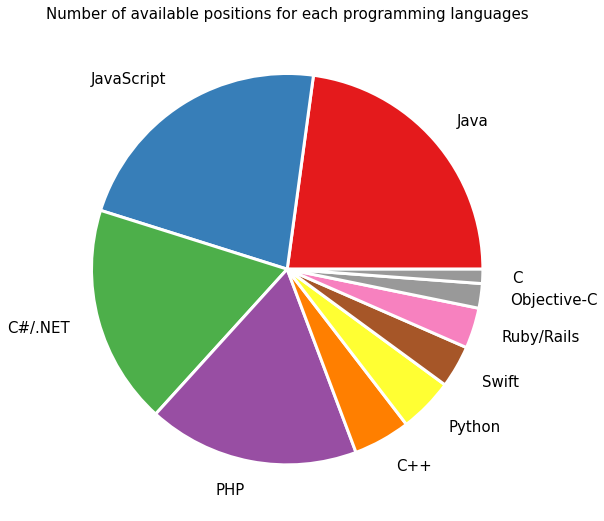

In [72]:
# check popylar programming languages
%matplotlib inline
from matplotlib import cm

df_by_language = df.groupby('Язык.программирования', group_keys=False).agg(
    {'Язык.программирования' : ['count']}).rename(
    columns={'Язык.программирования': 'Количество'}).apply(lambda x: x.sort_values(ascending=False))
labels = df_by_language.index.tolist()[:10]
data = by_language.values.flatten().tolist()[:10]
fig = plt.figure(figsize=(9,9))
plt.pie(data, labels=labels, labeldistance=1.15,
        textprops = {"fontsize":15},
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors = cm.Set1(np.arange(40)/9))
plt.title("Number of available positions for each programming languages", fontsize=15)

plt.show()

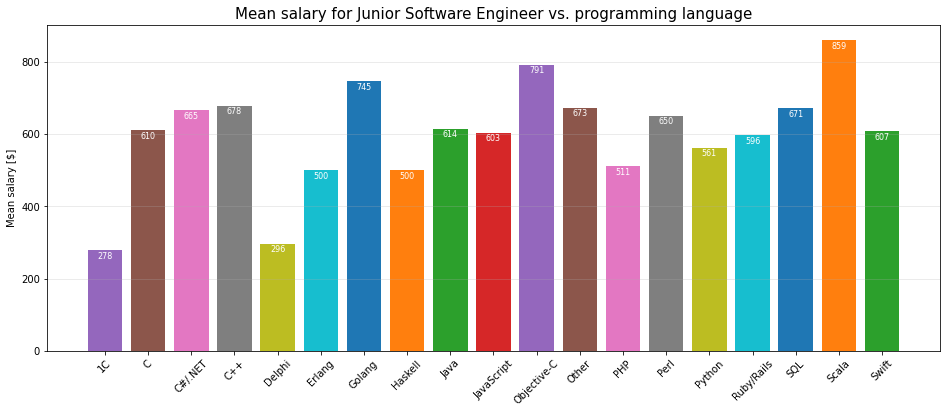

In [62]:
# get mean salary for Junior positions
df_juniors = df[df['Должность']=='Junior Software Engineer']
avg_salary = df_juniors.groupby(['Язык.программирования']).agg({'Зарплата.в.месяц' : ['mean']}).rename(columns={'Зарплата.в.месяц': 'avg'}).round(0).astype(int).apply(lambda x: x.sort_index())
fig, ax = plt.subplots()
bars = ax.bar(avg_salary.index.tolist(), avg_salary.values.flatten().tolist(), 
              color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.bar_label(bars, fontsize=8, padding=-10, color='white')
plt.title("Mean salary for Junior Software Engineer vs. programming language", fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.ylabel('Mean salary [$]')
fig.set_size_inches(16, 6)
plt.show()